In [2]:
import construction as cs
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp


import dynamic_metrics as ds


import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# simulation
## figure sotto

In [28]:
def load_origin_graph(file_name,gap=299):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    gap = 299 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph(file_name):
    path = "../Generated_graphs/Multiple_run/"+file_name+"/"
    gap = 299 
    graphs = []
    for i in os.listdir(path):
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs


def load_dym_graph(file_name):
    path = "../Competitors_generated_graphs/Dymond/Multiple_run/"+file_name+"/"
    gap = 0 
    graphs = []
    for i in os.listdir(path)[0:2]:
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

def load_stm_graph(file_name):
    path = "../Competitors_generated_graphs/STM/Multiple_run/"+file_name+"/"
    gap = 0 
    graphs = []
    for i in os.listdir(path)[0:2]:
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

def load_tag_graph(file_name):
    path = "../Competitors_generated_graphs/TagGen/Multiple_run/"+file_name+"/"
    gap = 0 
    graphs = []
    for i in os.listdir(path)[0:2]:
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

In [39]:
import os 

In [73]:
file_name = "InVS13"
#file_name = "LH10"
#file_name = "High_School11"

orig_graphs = load_origin_graph(file_name,gap=299)
etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
tag_gen = load_tag_graph(file_name)
stm_gen = load_stm_graph(file_name)

../Competitors_generated_graphs/TagGen/Multiple_run/InVS13/InVS13_6_generato_TagGen.dat
../Competitors_generated_graphs/TagGen/Multiple_run/InVS13/InVS13_0_generato_TagGen.dat
../Competitors_generated_graphs/STM/Multiple_run/InVS13/InVS13_STM_3.dat
../Competitors_generated_graphs/STM/Multiple_run/InVS13/InVS13_STM_7.dat


In [82]:
ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal

mu = 0.01
rep = 50

#start = 285 # HS
#start = 210 # LH
#start = 290 #Invs
#p = "_2picco"


#p = "_meta"
#start = int(len(orig_graphs)/2)
#start



start = 0
p = ""

print(start,p)

0 


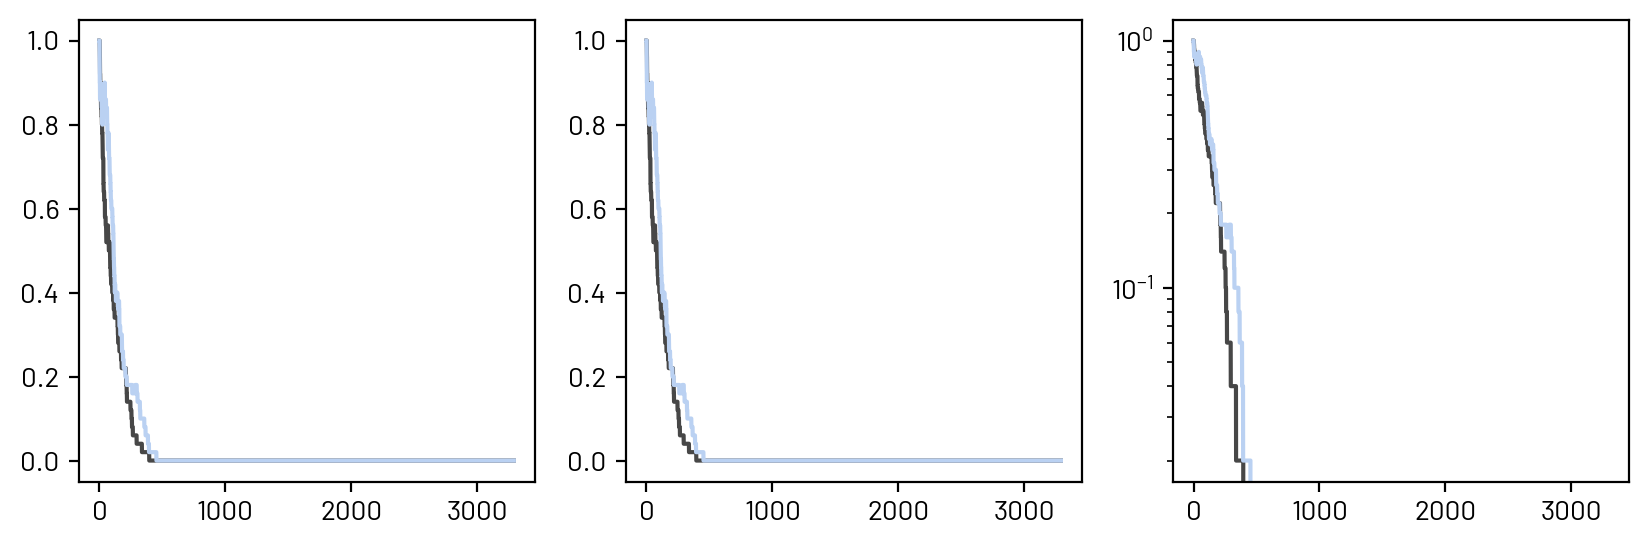

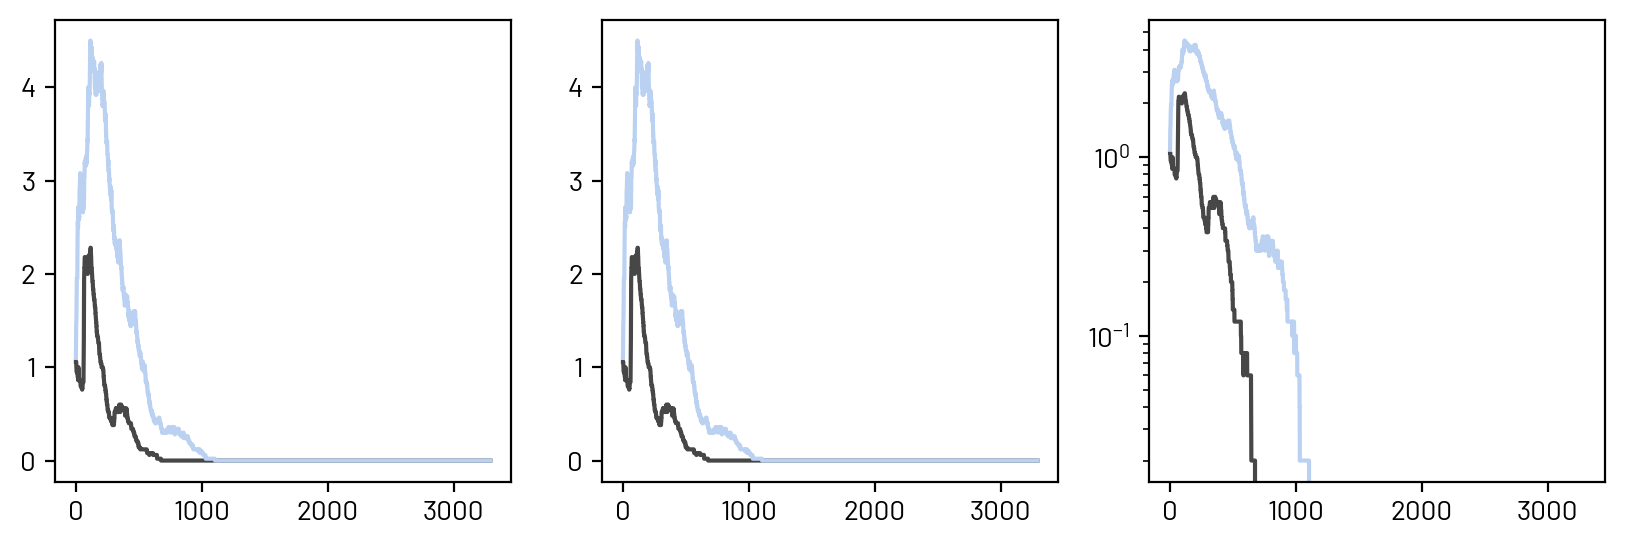

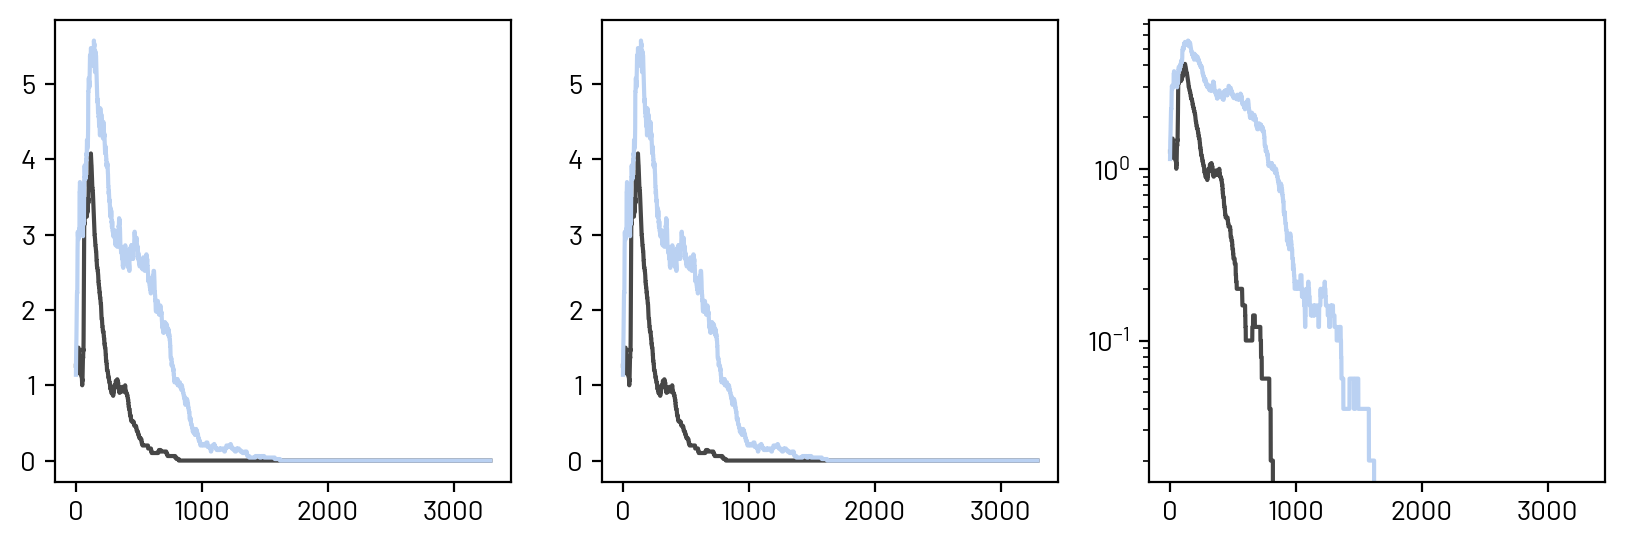

In [83]:
for lamb in [0.01,0.15,0.25]:
    res = []

    n = list(orig_graphs[0].edges())[0][0]
    for i in range(rep):
        _,_,_,Is,_ = ds.SIR_model(orig_graphs[start:],n,lambd = lamb,mu = mu)
        tmp = [len(i) for i in Is]
        res.append(tmp)

    mean1 = np.mean(res,axis=0)
    std = np.std(res,axis=0)
    if lamb == 0.01:
        slamb = "la001"
    elif lamb == 0.15:
        slamb = "la015"
    elif lamb == 0.25:
        slamb = "la025"
    else:
        assert (False)

    np.save("dynamic_results/"+file_name+"/Multiple_run/R0"+p+"/"+slamb+"/ori_infected_time.npy",[mean1,std])
    

    res = []
    n = list(tag_gen[0][0].edges())[0][0]
    for i in range(rep):
        _,_,_,Is,_ = ds.SIR_model(tag_gen[0][start:],n,lambd = lamb,mu = mu)
        tmp = [len(i) for i in Is]
        res.append(tmp)

    mean3 = np.mean(res,axis=0)
    std = np.std(res,axis=0)

    np.save("dynamic_results/"+file_name+"/Multiple_run/R0"+p+"/"+slamb+"/tag_infected_time.npy",[mean3,std])



    res = []
    n = list(dym_gen[0][0].edges())[0][0]
    for i in range(rep):
        _,_,_,Is,_ = ds.SIR_model(dym_gen[0][start:],n,lambd = lamb,mu = mu)
        tmp = [len(i) for i in Is]
        res.append(tmp)

    mean5 = np.mean(res,axis=0)
    std = np.std(res,axis=0)

    np.save("dynamic_results/"+file_name+"/Multiple_run/R0"+p+"/"+slamb+"/dym_infected_time.npy",[mean5,std])

    res = []
    n = list(etn_gen[0][0].edges())[0][0]
    for i in range(rep):
        _,_,_,Is,_ = ds.SIR_model(etn_gen[4][start:],n,lambd = lamb,mu = mu)
        tmp = [len(i) for i in Is]
        res.append(tmp)

    mean2 = np.mean(res,axis=0)
    std = np.std(res,axis=0)

    np.save("dynamic_results/"+file_name+"/Multiple_run/R0"+p+"/"+slamb+"/etn_infected_time.npy",[mean2,std])   
    
    print("dynamic_results/"+file_name+"/Multiple_run/R0"+p+"/"+slamb+"/etn_infected_time.npy")


    
    
    res = []
    n = list(stm_gen[0][0].edges())[0][0]
    for i in range(rep):
        _,_,_,Is,_ = ds.SIR_model(stm_gen[0][start:],n,lambd = lamb,mu = mu)
        tmp = [len(i) for i in Is]
        res.append(tmp)

    mean4 = np.mean(res,axis=0)
    std = np.std(res,axis=0)

    np.save("dynamic_results/"+file_name+"/Multiple_run/R0"+p+"/"+slamb+"/stm_infected_time.npy",[mean4,std])
    
    
    plt.figure(figsize=(10,3))
    plt.subplot(131)
    plt.plot(mean1,color=ORIGINAL_COLOR)
    #plt.plot(mean2,color=ETN_COLOR)
    #plt.plot(mean3,color=TAG_COLOR)
    plt.plot(mean4,color=STM_COLOR)
    #plt.plot(mean5,color=DYM_COLOR)

    plt.subplot(132)
    plt.plot(mean1,color=ORIGINAL_COLOR)
    #plt.plot(mean2,color=ETN_COLOR)
    plt.plot(mean4,color=STM_COLOR)
    #plt.plot(mean5,color=DYM_COLOR)

    plt.subplot(133)
    plt.plot(mean1,color=ORIGINAL_COLOR)
    #plt.plot(mean2,color=ETN_COLOR)
    #plt.plot(mean3,color=TAG_COLOR)
    plt.plot(mean4,color=STM_COLOR)
    #plt.plot(mean5,color=DYM_COLOR)
    plt.yscale("log")

    plt.show()

# load sir 

In [84]:
file_name = "LH10"


ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal

#p = "_2picco"
p = "_meta"
#p = ""

print(file_name,p)

LH10 _meta


In [85]:
    
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

def load_sim_sir(file_name,p,lamb):
    if lamb == 0.01:
        slamb = "la001"
    elif lamb == 0.15:
        slamb = "la015"
    elif lamb == 0.25:
        slamb = "la025"
    else:
        assert (False)
        

    ori_m,ori_s = np.load("dynamic_results/"+file_name+"/Multiple_run/R0"+p+"/"+slamb+"/ori_infected_time.npy")   
    etn_m,etn_s = np.load("dynamic_results/"+file_name+"/Multiple_run/R0"+p+"/"+slamb+"/etn_infected_time.npy")
    tag_m,tag_s = np.load("dynamic_results/"+file_name+"/Multiple_run/R0"+p+"/"+slamb+"/tag_infected_time.npy")
    stm_m,stm_s = np.load("dynamic_results/"+file_name+"/Multiple_run/R0"+p+"/"+slamb+"/stm_infected_time.npy")
    dym_m,dym_s = np.load("dynamic_results/"+file_name+"/Multiple_run/R0"+p+"/"+slamb+"/dym_infected_time.npy")
    
    
    return ori_m,ori_s,etn_m,etn_s,tag_m,tag_s,stm_m,stm_s,dym_m,dym_s


In [86]:
def plot_sim(ax,file_name,p,lamb):
    ori_m,ori_s,etn_m,etn_s,tag_m,tag_s,stm_m,stm_s,dym_m,dym_s = load_sim_sir(file_name,p,lamb)
    ax.plot(ori_m,color=ORIGINAL_COLOR)
    ax.plot(etn_m,color=ETN_COLOR)
    ax.plot(tag_m,color=TAG_COLOR)
    ax.plot(stm_m,color=STM_COLOR)
    ax.plot(dym_m,color=DYM_COLOR)
    

def plot_sim_fb(ax,file_name,p,lamb):
    alpha = 0.1
    ori_m,ori_s,etn_m,etn_s,tag_m,tag_s,stm_m,stm_s,dym_m,dym_s = load_sim_sir(file_name,p,lamb)
    x = np.arange(len(ori_m))
    ax.plot(x,ori_m,color=ORIGINAL_COLOR)
    ax.fill_between(x,ori_m,ori_m-ori_s,color=ORIGINAL_COLOR,alpha=alpha)
    ax.fill_between(x,ori_m,ori_m+ori_s,color=ORIGINAL_COLOR,alpha=alpha)
    
    x = np.arange(len(etn_m))
    ax.plot(x,etn_m,color=ETN_COLOR)
    ax.fill_between(x,etn_m,etn_m-etn_s,color=ETN_COLOR,alpha=alpha)
    ax.fill_between(x,etn_m,etn_m+etn_s,color=ETN_COLOR,alpha=alpha)
    
    x = np.arange(len(tag_m))
    ax.plot(x,tag_m,color=TAG_COLOR)
    ax.fill_between(x,tag_m,tag_m-tag_s,color=TAG_COLOR,alpha=alpha)
    ax.fill_between(x,tag_m,tag_m+tag_s,color=TAG_COLOR,alpha=alpha)
    
    
    x = np.arange(len(stm_m))
    ax.plot(x,stm_m,color=STM_COLOR)
    ax.fill_between(x,stm_m,stm_m-stm_s,color=STM_COLOR,alpha=alpha)
    ax.fill_between(x,stm_m,stm_m+stm_s,color=STM_COLOR,alpha=alpha)
    x = np.arange(len(dym_m))
    ax.plot(x,dym_m,color=DYM_COLOR)
    ax.fill_between(x,dym_m,dym_m-dym_s,color=DYM_COLOR,alpha=alpha)
    ax.fill_between(x,dym_m,dym_m+dym_s,color=DYM_COLOR,alpha=alpha)

    
def extend_meta(m,s,):
    mean = []
    std = []
    
    
    for i in range(len(m)):
        mean.append(0)
        std.append(0)

    for i in range(len(m)):
        mean.append(m[i])
        std.append(s[i])
        
    return mean,std

def plot_sim_meta(ax,file_name,p,lamb):
    ori_m,ori_s,etn_m,etn_s,tag_m,tag_s,stm_m,stm_s,dym_m,dym_s = load_sim_sir(file_name,p,lamb)
    
    ori_m ,_ = extend_meta(ori_m,ori_s)
    ax.plot(ori_m,color=ORIGINAL_COLOR)
    etn_m ,_ = extend_meta(etn_m,etn_s)
    ax.plot(etn_m,color=ETN_COLOR)
    
    tag_m ,_ = extend_meta(tag_m,tag_s)
    ax.plot(tag_m,color=TAG_COLOR)
    
    stm_m ,_ = extend_meta(stm_m,stm_s)
    ax.plot(stm_m,color=STM_COLOR)
     
    dym_m ,_ = extend_meta(dym_m,dym_s)
    ax.plot(dym_m,color=DYM_COLOR)
    
    
    
    #start = 285 # HS
#start = 210 # LH
#start = 290 #Invs
#p = "_2picco"
def extend_2picco(m,s,file_name):
    mean = []
    std = []
    
    if file_name == "LH10":
        start = 210
    elif file_name == "InVS13":
        start = 290
    elif file_name == "High_School11":
        start = 258
    else:
        assert(False)
    
    for i in range(start):
        mean.append(0)
        std.append(0)

    for i in range(len(m)):
        mean.append(m[i])
        std.append(s[i])
        
    return mean,std

def plot_sim_2picco(ax,file_name,p,lamb):
    ori_m,ori_s,etn_m,etn_s,tag_m,tag_s,stm_m,stm_s,dym_m,dym_s = load_sim_sir(file_name,p,lamb)
    
    ori_m ,_ = extend_2picco(ori_m,ori_s,file_name)
    ax.plot(ori_m,color=ORIGINAL_COLOR)
    etn_m ,_ = extend_2picco(etn_m,etn_s,file_name)
    ax.plot(etn_m,color=ETN_COLOR)
    
    tag_m ,_ = extend_2picco(tag_m,tag_s,file_name)
    ax.plot(tag_m,color=TAG_COLOR)
    
    stm_m ,_ = extend_2picco(stm_m,stm_s,file_name)
    ax.plot(stm_m,color=STM_COLOR)
    
    dym_m ,_ = extend_2picco(dym_m,dym_s,file_name)
    ax.plot(dym_m,color=DYM_COLOR)
    

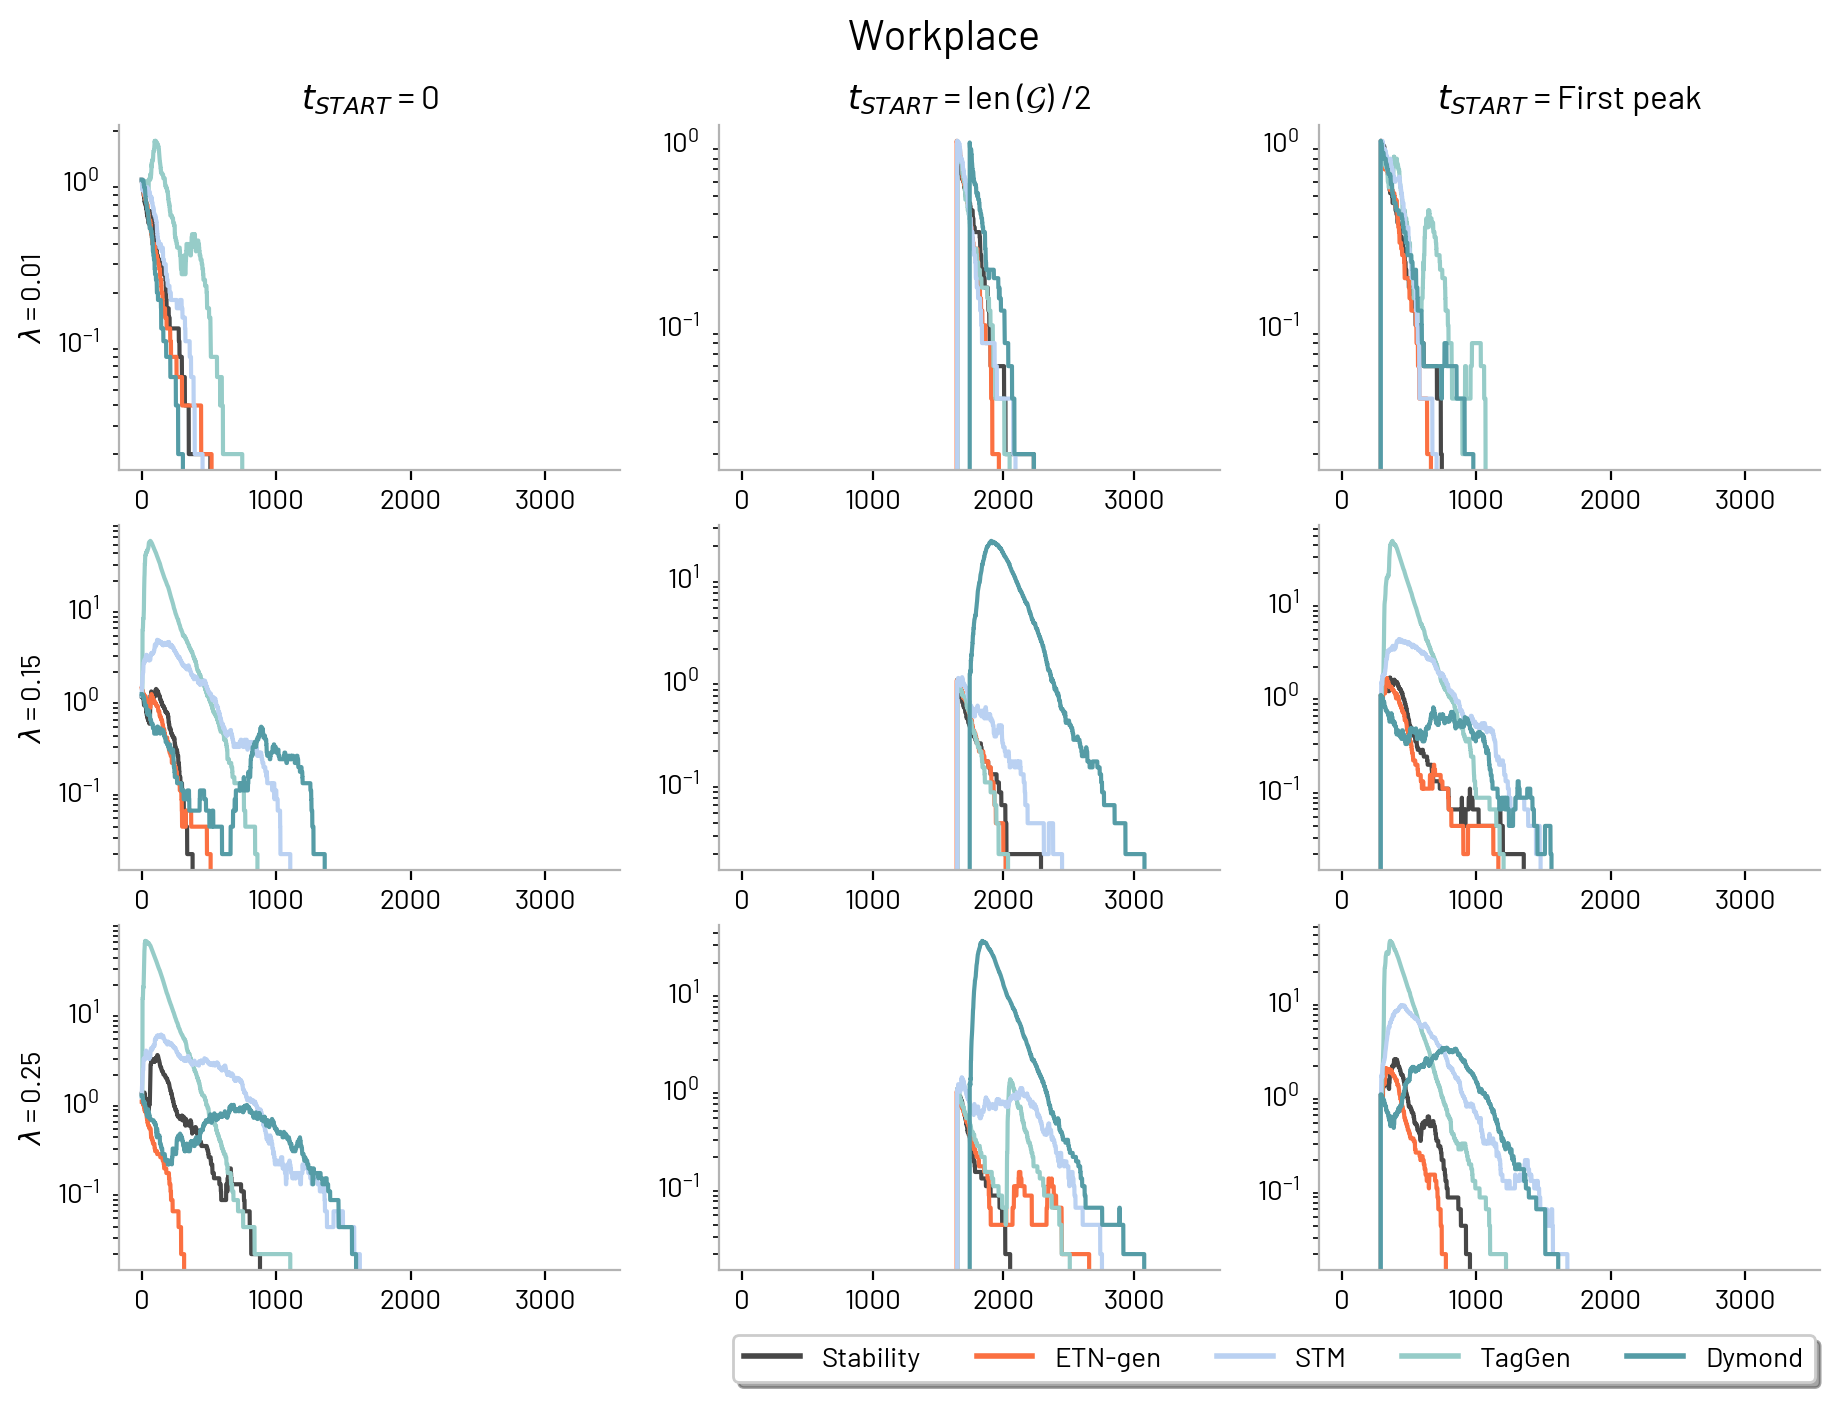

In [89]:
file_name = "High_School11"
file_name = "LH10"
file_name = "InVS13"

fig, ax = plt.subplots(3,3,figsize=(9,6),sharey=False)
fig.tight_layout(pad=0)


plot_sim(ax[0][0],file_name,"",lamb = 0.01)
plot_sim_meta(ax[0][1],file_name,"_meta",lamb = 0.01)
plot_sim_2picco(ax[0][2],file_name,"_2picco",lamb = 0.01)


plot_sim(ax[1][0],file_name,"",lamb = 0.15)
plot_sim_meta(ax[1][1],file_name,"_meta",lamb = 0.15)
plot_sim_2picco(ax[1][2],file_name,"_2picco",lamb = 0.15)


plot_sim(ax[2][0],file_name,"",lamb = 0.25)
plot_sim_meta(ax[2][1],file_name,"_meta",lamb = 0.25)
plot_sim_2picco(ax[2][2],file_name,"_2picco",lamb = 0.25)

ax[0][0].set_title("$t_{START}$ = 0")
ax[0][1].set_title("$t_{START}$ = len ($\mathcal{G}$) /2")
ax[0][2].set_title("$t_{START}$ = First peak")

ax[0][0].set_ylabel(r"$\lambda$ = 0.01")
ax[1][0].set_ylabel(r"$\lambda$ = 0.15")
ax[2][0].set_ylabel(r"$\lambda$ = 0.25")

for i in range(3):
    for j in range(3):
        ax[i][j].set_yscale("log")
        
#ax[0][0].set_xticks([])
#ax[0][1].set_xticks([])
#ax[0][2].set_xticks([])
#ax[1][0].set_xticks([])
#ax[1][1].set_xticks([])
#ax[1][2].set_xticks([])
        

for i in range(3):
    for j in range(3):
        ax[i][j].set_yscale("log")
        ax[i][j].tick_params(bottom=True, right=False,left=False)
        ax[i][j].set_axisbelow(True)
        #ax[i][j].yaxis.grid(True, color='#b3b3b3')
        ax[i][j].yaxis.grid(False)
        ax[i][j].xaxis.grid(False)

        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['left'].set_visible(True)
        ax[i][j].spines['bottom'].set_visible(True)
        
        ax[i][j].spines['bottom'].set_color("#b3b3b3")
        ax[i][j].spines['left'].set_color("#b3b3b3")

custom_lines = [Line2D([0], [0], color=ORIGINAL_COLOR, lw=2, label='Line'),
                Line2D([0], [0], color=ETN_COLOR, lw=2, label='Line'),
                Line2D([0], [0], color=STM_COLOR, lw=2, label='Line'),
                Line2D([0], [0], color=TAG_COLOR, lw=2, label='Line'),
                Line2D([0], [0], color=DYM_COLOR, lw=2, label='Line')]

ax[2][2].legend(custom_lines, ['Stability','ETN-gen', 'STM', 'TagGen', "Dymond"],
               loc='upper center', bbox_to_anchor=(-0.09, -0.15),
          fancybox=True, shadow=True, ncol=5)

if file_name == "InVS13":
    plt.suptitle("Workplace",y=1.08,fontsize=15)
    
    
if file_name == "LH10":
    plt.suptitle("Hospital",y=1.08,fontsize=15)
    
    
if file_name == "High_School11":
    plt.suptitle("High school",y=1.08,fontsize=15)
    
fig.savefig("COM_PHY_new_fig/SIR_model_nbInfected"+file_name+".pdf", bbox_inches = 'tight')

# RW sim

In [90]:
def random_walk(graphs,t0,n0,T=100):
    RW = []
    for i in range(T):
        RW.append(n0)
        t0 = t0 + 1 
        g0 = graphs[t0]
        neig = list(nx.neighbors(g0,n0))
        if not neig == []:
            n0 = np.random.choice(neig)
            
    return RW

def count_rw(graphs,t):
    n = list(graphs[0].edges())[0][0]
    k = random_walk(graphs,t,n,len(graphs)-(t+1))
    seen = dict()
    for n in graphs[0]:
        seen[n] = False

    res = []
    c = 0
    for i in k:
        if not seen[i]:
            c = c + 1
            seen[i] = True
        else:
            c = c 
        res.append(c)
    return res

In [113]:
#file_name = "InVS13"
#file_name = "LH10"
file_name = "High_School11"

orig_graphs = load_origin_graph(file_name,gap=299)
etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
tag_gen = load_tag_graph(file_name)
stm_gen = load_stm_graph(file_name)


../Generated_graphs/Multiple_run/High_School11/hs_5.dat
../Generated_graphs/Multiple_run/High_School11/hs_6.dat
../Generated_graphs/Multiple_run/High_School11/hs_7.dat
../Generated_graphs/Multiple_run/High_School11/hs_9.dat
../Generated_graphs/Multiple_run/High_School11/hs_1.dat
../Generated_graphs/Multiple_run/High_School11/hs_2.dat
../Generated_graphs/Multiple_run/High_School11/hs_8.dat
../Generated_graphs/Multiple_run/High_School11/hs_0.dat
../Generated_graphs/Multiple_run/High_School11/hs_4.dat
../Generated_graphs/Multiple_run/High_School11/hs_3.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym1.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym7.dat
../Competitors_generated_graphs/TagGen/Multiple_run/High_School11/High_School11_8_generato_TagGen.dat
../Competitors_generated_graphs/TagGen/Multiple_run/High_School11/High_School11_5_generato_TagGen.dat
../Competitors_generated_graphs/STM/Multiple_run/High_Scho

In [114]:
print(len(stm_gen[0]))

898


In [115]:
stm_gen[0].extend(stm_gen[0][-(len(orig_graphs)-len(stm_gen[0])):])

In [116]:
dym_gen[0] = dym_gen[0][:len(orig_graphs)]

In [117]:
len(stm_gen[0]),len(orig_graphs),len(dym_gen[0]),len(tag_gen[0])

(908, 908, 908, 908)

In [118]:
import os

path = "dynamic_results/"+file_name+"/Multiple_run"
RW = path+"/RW"

if not os.path.exists(RW):
    os.makedirs(RW)
    
print(RW)
rep = 50


if file_name == "LH10":
    start = 210
elif file_name == "InVS13":
    start = 290
elif file_name == "High_School11":
    start = 258
else:
    assert(False)
    

dynamic_results/High_School11/Multiple_run/RW


dynamic_results/High_School11/Multiple_run/RW/rw_dym.npy


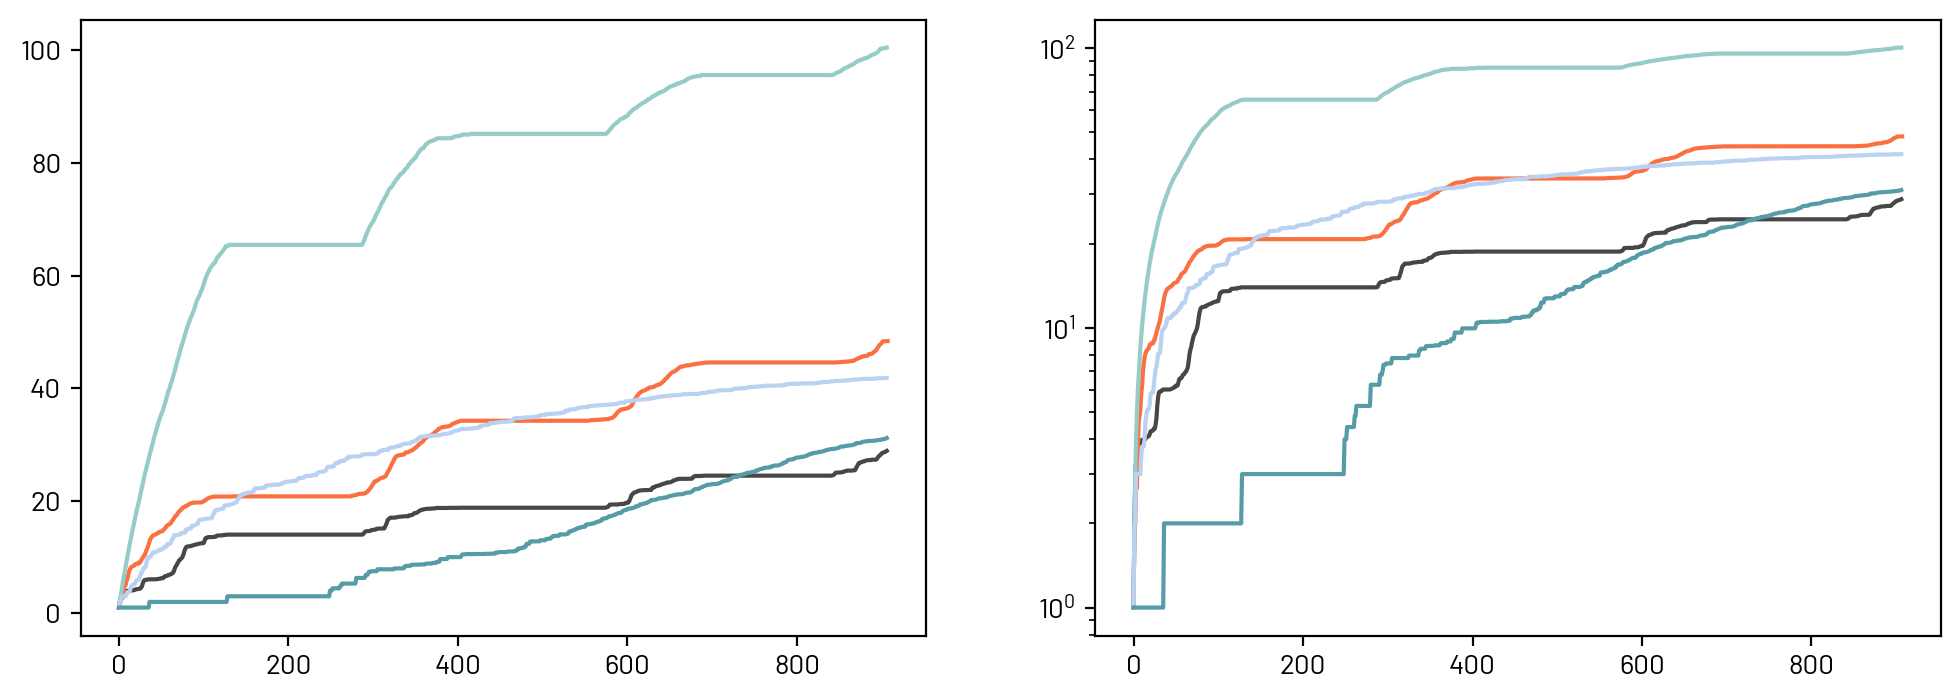

dynamic_results/High_School11/Multiple_run/RW/rw_dym_meta.npy


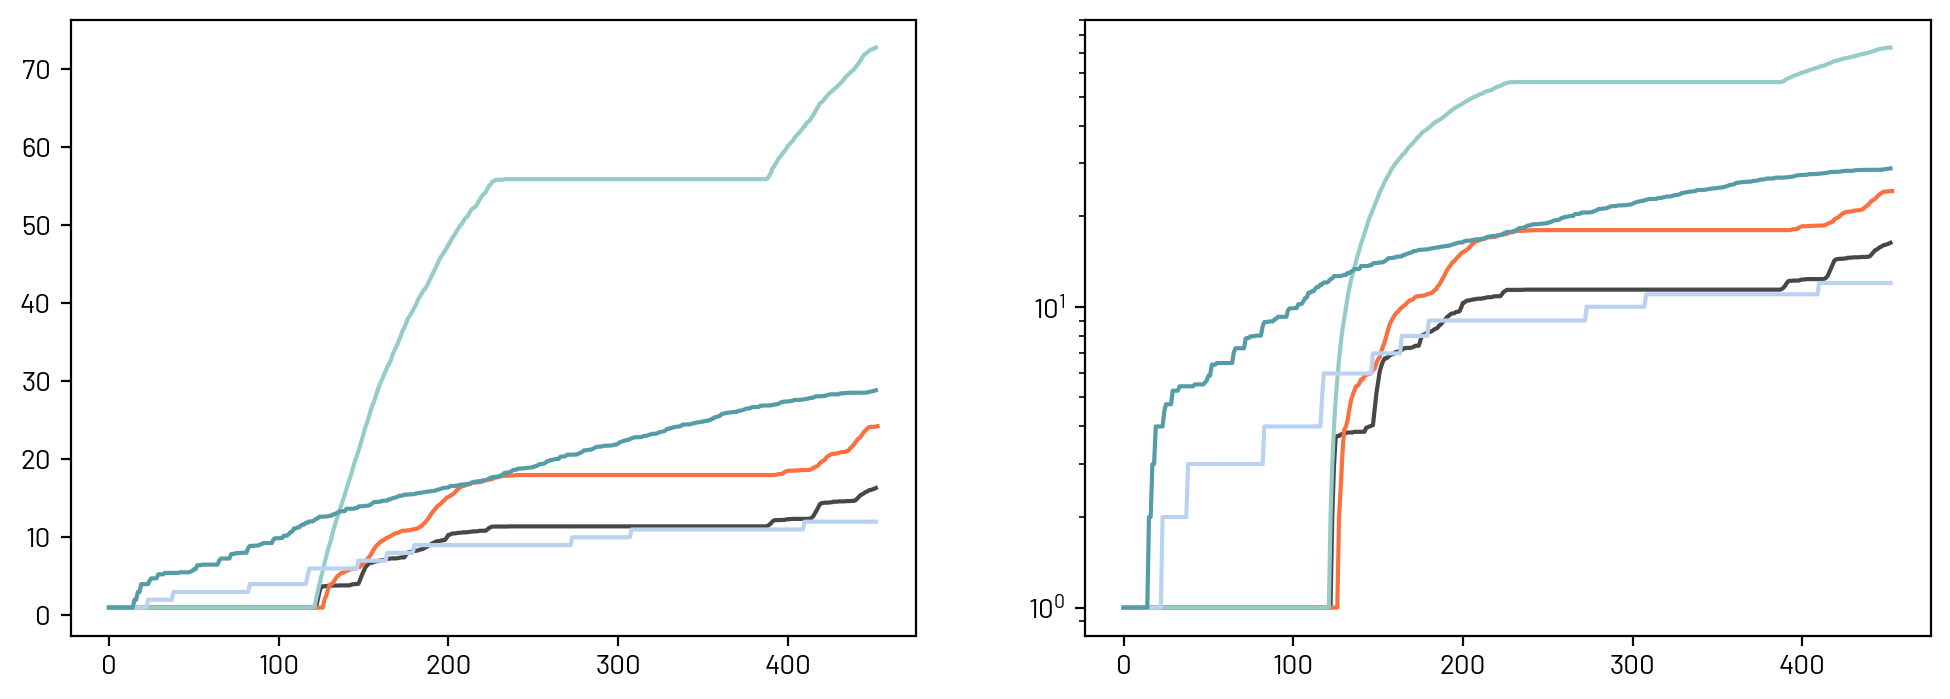

dynamic_results/High_School11/Multiple_run/RW/rw_dym_2picco.npy


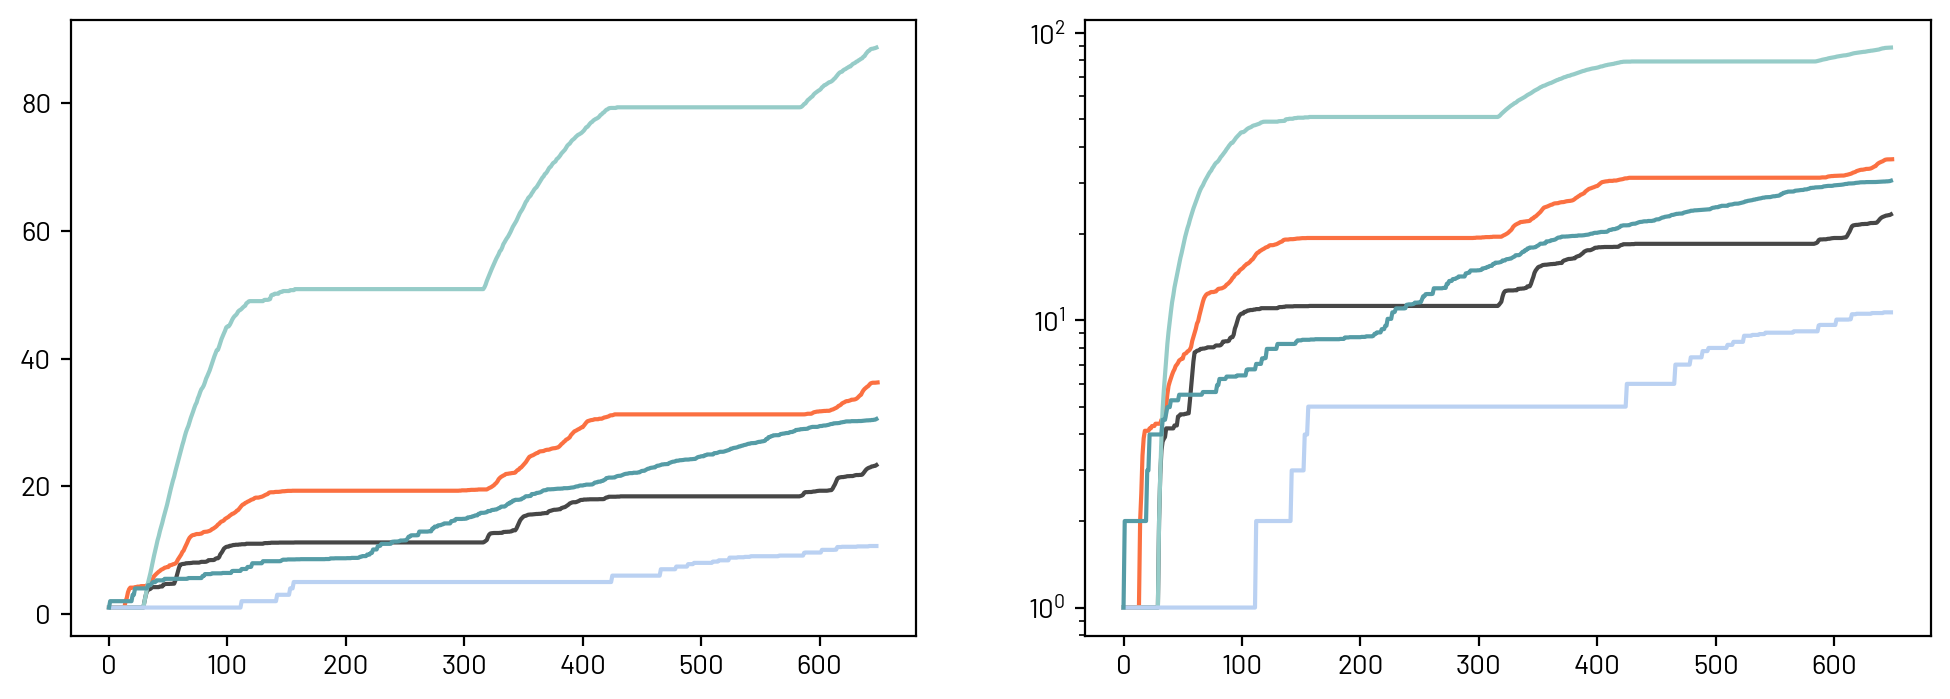

In [119]:
for start in [0,int(len(orig_graphs)/2),"secondopicco"]:
    if start == 0:
        p = ""
    elif start == int(len(orig_graphs)/2):
        p = "_meta"
    else:
        if file_name == "LH10":
            start = 210
        elif file_name == "InVS13":
            start = 290
        elif file_name == "High_School11":
            start = 258
        else:
            assert(False)
        p = "_2picco"

    tmp = []
    for i in range(rep):
        tmp.append(count_rw(orig_graphs,start))

    m_ori = np.mean(tmp,axis=0)
    s_ori = np.std(tmp,axis=0)

    np.save(RW+"/rw_ori"+p+".npy",[m_ori,s_ori])

    tmp = []
    for i in range(rep):
        tmp.append(count_rw(etn_gen[2],start))

    m_etn = np.mean(tmp,axis=0)
    s_etn = np.std(tmp,axis=0)
    np.save(RW+"/rw_etn"+p+".npy",[m_etn,s_etn])

    tmp = []
    for i in range(rep):
        tmp.append(count_rw(tag_gen[0],start))

    m_tag = np.mean(tmp,axis=0)
    s_tag = np.std(tmp,axis=0)
    np.save(RW+"/rw_tag"+p+".npy",[m_tag,s_tag])

    tmp = []
    for i in range(rep):
        tmp.append(count_rw(stm_gen[0],start))

    m_stm = np.mean(tmp,axis=0)
    s_stm = np.std(tmp,axis=0)
    np.save(RW+"/rw_stm"+p+".npy",[m_stm,s_stm])



    tmp = []
    for i in range(rep):
        tmp.append(count_rw(dym_gen[0],start))

    m_dym = np.mean(tmp,axis=0)
    s_dym = np.std(tmp,axis=0)
    np.save(RW+"/rw_dym"+p+".npy",[m_dym,s_dym])

    print(RW+"/rw_dym"+p+".npy")
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.plot(m_ori,color=ORIGINAL_COLOR)
    plt.plot(m_etn,color=ETN_COLOR)
    plt.plot(m_tag,color=TAG_COLOR)
    plt.plot(m_stm,color=STM_COLOR)
    plt.plot(m_dym,color=DYM_COLOR)
    plt.subplot(122)
    plt.plot(m_ori,color=ORIGINAL_COLOR)
    plt.plot(m_etn,color=ETN_COLOR)
    plt.plot(m_tag,color=TAG_COLOR)
    plt.plot(m_stm,color=STM_COLOR)
    plt.plot(m_dym,color=DYM_COLOR)
    plt.yscale("log")
    plt.show()

# load RW sim

In [131]:
def load_RW_sim(file_name,p):
    path = "dynamic_results/"+file_name+"/Multiple_run"
    RW = path+"/RW"
    m_ori,s_ori = np.load(RW+"/rw_ori"+p+".npy")
    m_etn,s_etn = np.load(RW+"/rw_etn"+p+".npy")
    m_tag,s_tag = np.load(RW+"/rw_tag"+p+".npy")
    m_stm,s_stm = np.load(RW+"/rw_stm"+p+".npy")
    m_dym,s_dym = np.load(RW+"/rw_dym"+p+".npy")
    
    return m_ori,s_ori,m_etn,s_etn,m_tag,s_tag,m_stm,s_stm,m_dym,s_dym

def plot_sim(ax,file_name,p):
    
    ori_m,ori_s,etn_m,etn_s,tag_m,tag_s,stm_m,stm_s,dym_m,dym_s = load_RW_sim(file_name,p)
    ax.plot(ori_m,color=ORIGINAL_COLOR)
    ax.plot(etn_m,color=ETN_COLOR)
    ax.plot(tag_m,color=TAG_COLOR)
    ax.plot(stm_m,color=STM_COLOR)
    ax.plot(dym_m,color=DYM_COLOR)
    
    
def extend_meta(m,s):
    mean = []
    std = []
    
    
    for i in range(len(m)):
        mean.append(0)
        std.append(0)

    for i in range(len(m)):
        mean.append(m[i])
        std.append(s[i])
        
    return mean,std

def plot_sim_meta(ax,file_name,p):
    ori_m,ori_s,etn_m,etn_s,tag_m,tag_s,stm_m,stm_s,dym_m,dym_s = load_RW_sim(file_name,p)
    
    ori_m ,_ = extend_meta(ori_m,ori_s)
    ax.plot(ori_m,color=ORIGINAL_COLOR)
    etn_m ,_ = extend_meta(etn_m,etn_s)
    ax.plot(etn_m,color=ETN_COLOR)
    
    tag_m ,_ = extend_meta(tag_m,tag_s)
    ax.plot(tag_m,color=TAG_COLOR)
    
    stm_m ,_ = extend_meta(stm_m,stm_s)
    ax.plot(stm_m,color=STM_COLOR)
     
    dym_m ,_ = extend_meta(dym_m,dym_s)
    ax.plot(dym_m,color=DYM_COLOR)
    
    
    #start = 285 # HS
#start = 210 # LH
#start = 290 #Invs
#p = "_2picco"
def extend_2picco(m,s,file_name):
    mean = []
    std = []
    
    if file_name == "LH10":
        start = 210
    elif file_name == "InVS13":
        start = 290
    elif file_name == "High_School11":
        start = 258
    else:
        assert(False)
    
    for i in range(start):
        mean.append(0)
        std.append(0)

    for i in range(len(m)):
        mean.append(m[i])
        std.append(s[i])
        
    return mean,std

def plot_sim_2picco(ax,file_name,p):
    ori_m,ori_s,etn_m,etn_s,tag_m,tag_s,stm_m,stm_s,dym_m,dym_s = load_RW_sim(file_name,p)
    
    ori_m ,_ = extend_2picco(ori_m,ori_s,file_name)
    ax.plot(ori_m,color=ORIGINAL_COLOR)
    etn_m ,_ = extend_2picco(etn_m,etn_s,file_name)
    ax.plot(etn_m,color=ETN_COLOR)
    
    tag_m ,_ = extend_2picco(tag_m,tag_s,file_name)
    ax.plot(tag_m,color=TAG_COLOR)
    
    stm_m ,_ = extend_2picco(stm_m,stm_s,file_name)
    ax.plot(stm_m,color=STM_COLOR)
    
    dym_m ,_ = extend_2picco(dym_m,dym_s,file_name)
    ax.plot(dym_m,color=DYM_COLOR)
    

In [132]:
p1 = ""
p2 = "_meta"
p3 = "_2picco"

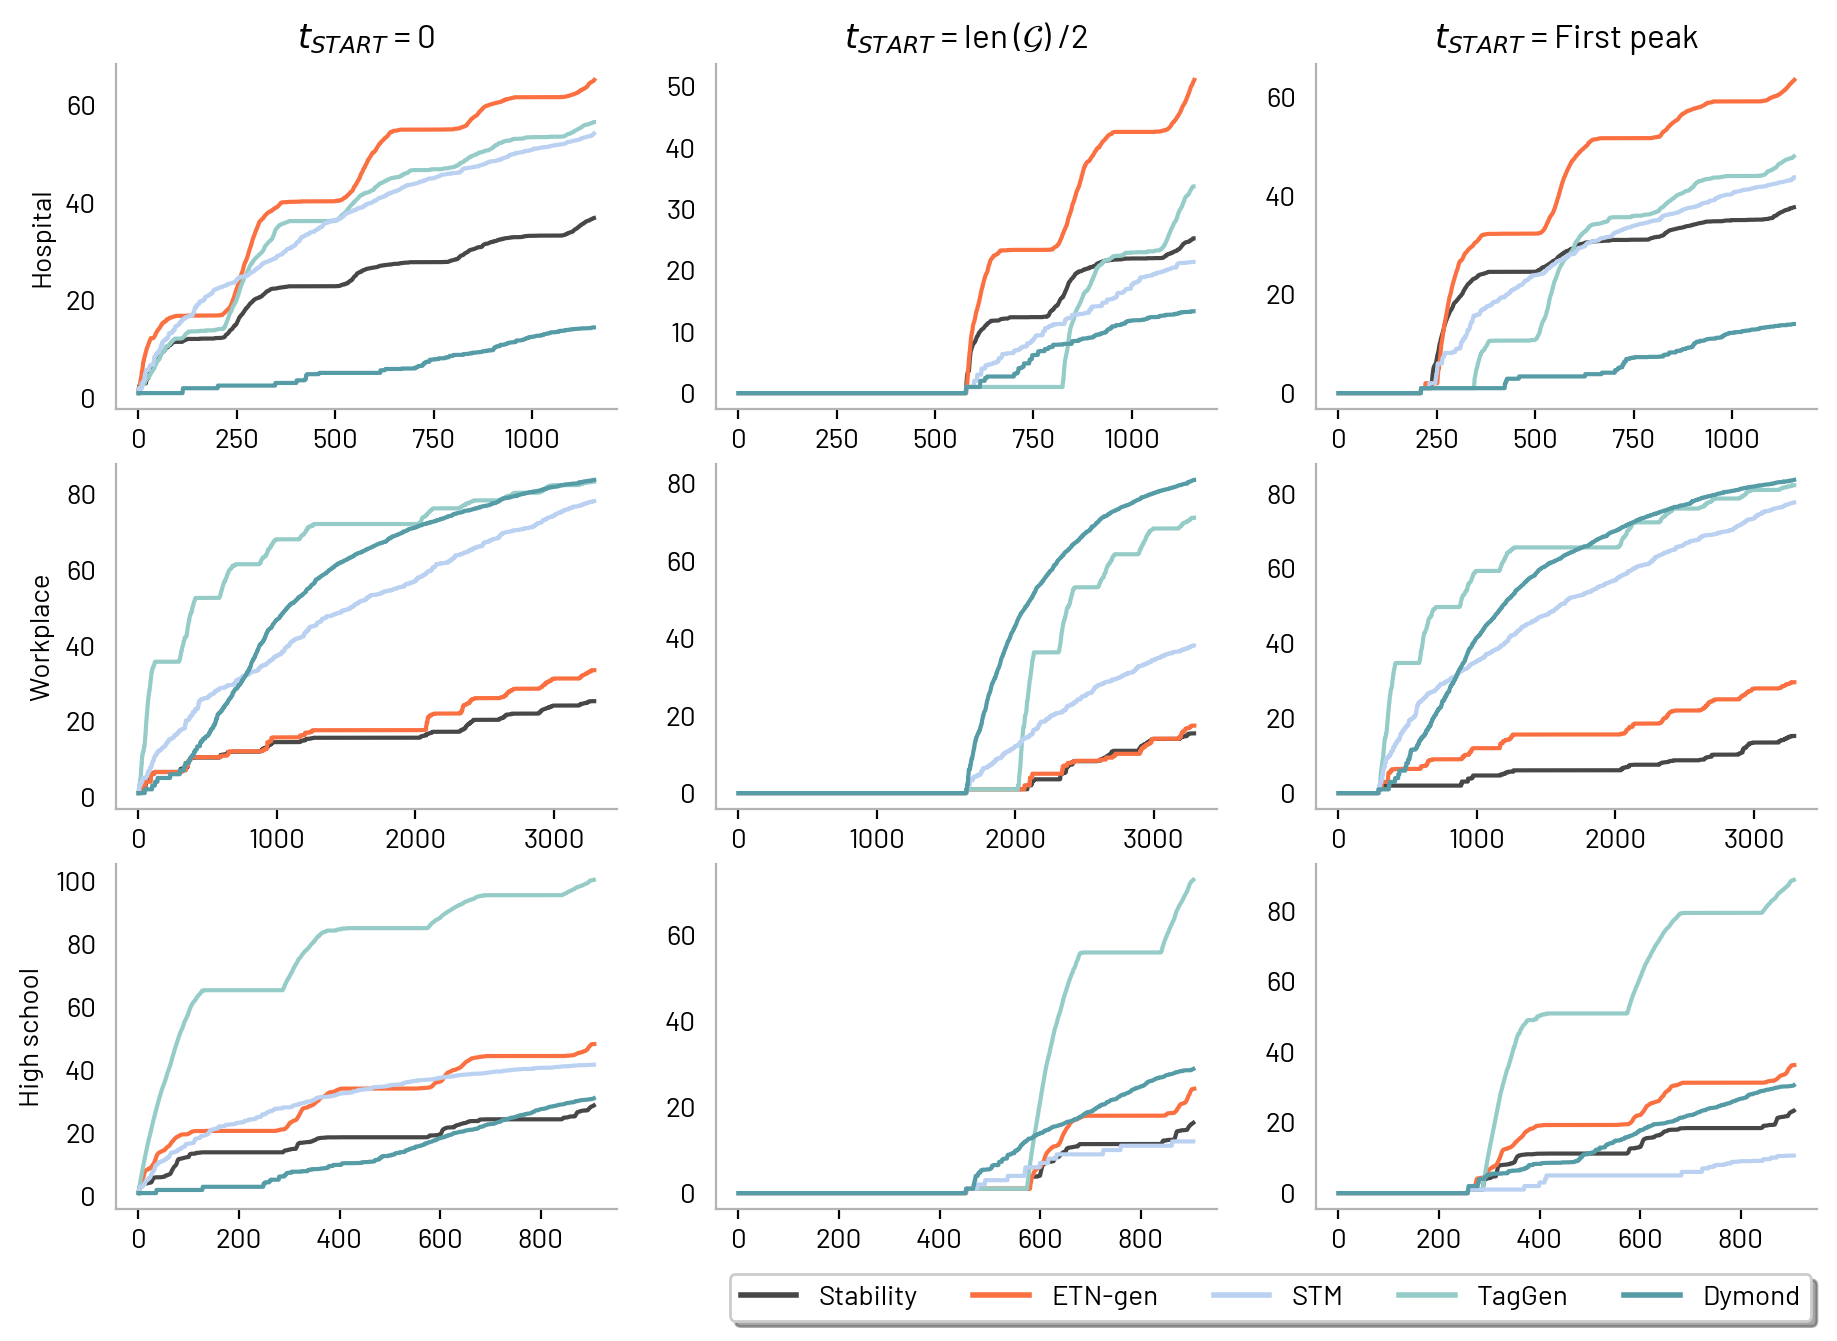

In [134]:

fig, ax = plt.subplots(3,3,figsize=(9,6),sharey=False)
fig.tight_layout(pad=0)

plot_sim(ax[0][0],"LH10",p1)
plot_sim(ax[1][0],"InVS13",p1)
plot_sim(ax[2][0],"High_School11",p1)


plot_sim_meta(ax[0][1],"LH10",p2)
plot_sim_meta(ax[1][1],"InVS13",p2)
plot_sim_meta(ax[2][1],"High_School11",p2)


plot_sim_2picco(ax[0][2],"LH10",p3)
plot_sim_2picco(ax[1][2],"InVS13",p3)
plot_sim_2picco(ax[2][2],"High_School11",p3)


ax[0][0].set_title("$t_{START}$ = 0")
ax[0][1].set_title("$t_{START}$ = len ($\mathcal{G}$) /2")
ax[0][2].set_title("$t_{START}$ = First peak")

ax[0][0].set_ylabel("Hospital")
ax[1][0].set_ylabel("Workplace")
ax[2][0].set_ylabel("High school")





#for i in range(3):
#    for j in range(3):
#        ax[i][j].set_yscale("log")        

for i in range(3):
    for j in range(3):
        ax[i][j].tick_params(bottom=True, right=False,left=False)
        ax[i][j].set_axisbelow(True)
        #ax[i][j].yaxis.grid(True, color='#b3b3b3')
        ax[i][j].yaxis.grid(False)
        ax[i][j].xaxis.grid(False)

        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['left'].set_visible(True)
        ax[i][j].spines['bottom'].set_visible(True)
        
        ax[i][j].spines['bottom'].set_color("#b3b3b3")
        ax[i][j].spines['left'].set_color("#b3b3b3")

custom_lines = [Line2D([0], [0], color=ORIGINAL_COLOR, lw=2, label='Line'),
                Line2D([0], [0], color=ETN_COLOR, lw=2, label='Line'),
                Line2D([0], [0], color=STM_COLOR, lw=2, label='Line'),
                Line2D([0], [0], color=TAG_COLOR, lw=2, label='Line'),
                Line2D([0], [0], color=DYM_COLOR, lw=2, label='Line')]

ax[2][2].legend(custom_lines, ['Stability','ETN-gen', 'STM', 'TagGen', "Dymond"],
               loc='upper center', bbox_to_anchor=(-0.09, -0.15),
          fancybox=True, shadow=True, ncol=5)
    
fig.savefig("COM_PHY_new_fig/RW_seen_nodes.pdf", bbox_inches = 'tight')